Answer all questions and submit them either as an IPython notebook, LaTeX document, or Markdown document. Provide full answers for each question, including interpretation of the results. Each question is worth 25 points.

This homework is due on Monday, November 30, 2015.

## Instructor comments below in large type

## Question 1

The `titanic.xls` spreadsheet in the `data` directory contains data regarding the passengers on the Titanic when it sank in 1912. A recent [Kaggle competition](http://www.kaggle.com/c/titanic-gettingStarted) was based on predicting survival for passengers based on the attributes in the passenger list. 

Use scikit-learn to build both a support vector classifier and a logistic regression model to predict survival on the Titanic. Use cross-validation to assess your models, and try to tune them to improve performance.

Discuss the benefits and drawbacks of both approaches for application to such problems.

In [1]:
# Write your work here
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation
from sklearn.preprocessing import StandardScaler

def evaluate(clf, X, Y):
    all_auc = []

    #Randomly split data into train and test sets
    cv = cross_validation.KFold(n=Y.shape[0], n_folds=10)
    #cv = cross_validation.StratifiedKFold(Y, n_folds=10)
    all_fpr = []
    all_tpr = []
    all_distances = np.zeros(len(Y))
    for i, (train, test) in enumerate(cv):
        prep = StandardScaler()
        X_train = X[train]
        X_train = prep.fit_transform(X_train)
        X_test = prep.transform(X[test])
        distance = clf.fit(X_train, Y[train]).decision_function(X_test)
        all_distances[test] = distance

    return all_distances, metrics.roc_auc_score(Y, all_distances)

/Users/fonnescj/Github/scikit-learn/sklearn/cross_validation.py:42: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.19.
  "This module will be removed in 0.19.", DeprecationWarning)


In [4]:
#Load and clean data
titanic = pd.read_excel('../../../Bios8366/data/titanic.xls')

titanic = titanic.dropna(subset=['survived'])
titanic['female'] = titanic.sex.map({'female': 1, 'male': 0})
titanic['sibsp_onehot'] = titanic.sibsp.map({0:0,1:1,2:1})
titanic['embark_onehot'] = titanic.embarked.map({'C':0,'S':1})

#Replace missing values with mean
titanic.age.fillna((titanic.age.mean()), inplace=True)
titanic.fare.fillna((titanic.fare.mean()), inplace=True)
titanic = titanic.dropna(subset=['pclass','female','sibsp_onehot','parch','embark_onehot'])

#Build X and Y matrices from data
X = []
Y = []

for row in titanic.iterrows():
    index, data = row
    X.append([data.pclass, data.female, data.age, 
              data.fare, data.sibsp_onehot, 
              data.parch, data.embark_onehot])
    Y.append(data.survived)
    
X = np.asarray(X)
Y = np.asarray(Y)


AUC for SVM:
0.77920612335
AUC for LR:
0.834566508022


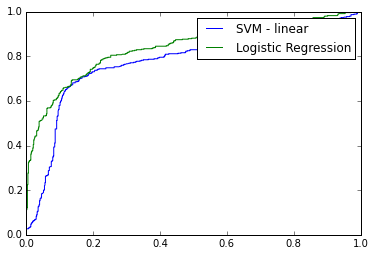

In [3]:
#Classifiers
clfs = [("SVM", svm.SVC(kernel='linear')), ("LR", LogisticRegression())]
for name, c in clfs:
    distances, auc = evaluate(c, X, Y)
    print("AUC for %s:" % name)
    print(auc)
    fpr,tpr,thresholds = metrics.roc_curve(Y, distances)
    plt.plot(fpr,tpr)
    
plt.legend(['SVM - linear','Logistic Regression'])

AUC for SVM 0.1 Linear:
0.795170338387
AUC for SVM 1 Linear:
0.77920612335
AUC for SVM 10 Linear:
0.789748622083
AUC for SVM 0.1 Linear L1-Norm:
0.835673748426
AUC for SVM 1 Linear L1-Norm:
0.835237067203
AUC for SVM 10 Linear L1-Norm:
0.835259964346
AUC for SVM 0.1 Linear L2-Norm:
0.835184730877
AUC for SVM 1 Linear L2-Norm:
0.835240338224
AUC for SVM 10 Linear L2-Norm:
0.835240338224
AUC for SVM 0.1 RBF:
0.834658096593
AUC for SVM 1 RBF:
0.819274487676
AUC for SVM 10 RBF:
0.79710024042
AUC for Logistic Regression:
0.834566508022


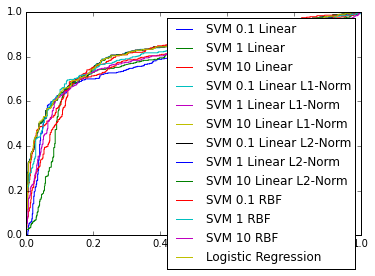

In [4]:
#The linear clearly works the best, let's optimize C
#Classifiers
clfs = [("SVM 0.1 Linear", svm.SVC(C=0.1,kernel='linear')), 
        ("SVM 1 Linear", svm.SVC(C=1, kernel='linear')), 
        ("SVM 10 Linear", svm.SVC(C=10, kernel='linear')),
        ("SVM 0.1 Linear L1-Norm", svm.LinearSVC(C=0.1,penalty='l1',dual=False,max_iter=100000)),
        ("SVM 1 Linear L1-Norm", svm.LinearSVC(C=1,penalty='l1',dual=False,max_iter=100000)),
        ("SVM 10 Linear L1-Norm", svm.LinearSVC(C=10,penalty='l1',dual=False,max_iter=100000)),
        ("SVM 0.1 Linear L2-Norm", svm.LinearSVC(C=0.1,penalty='l2',dual=False,max_iter=100000)),
        ("SVM 1 Linear L2-Norm", svm.LinearSVC(C=1,penalty='l2',dual=False,max_iter=100000)),
        ("SVM 10 Linear L2-Norm", svm.LinearSVC(C=10,penalty='l2',dual=False,max_iter=100000)),
        ("SVM 0.1 RBF", svm.SVC(C=0.1,kernel='rbf')), 
        ("SVM 1 RBF", svm.SVC(C=1, kernel='rbf')),
        ("SVM 10 RBF", svm.SVC(C=10, kernel='rbf')),
        ("Logistic Regression", LogisticRegression())]
for name, c in clfs:
    distances, auc = evaluate(c, X, Y)
    print("AUC for %s:" % name)
    print(auc)
    fpr,tpr,thresholds = metrics.roc_curve(Y, distances)
    plt.plot(fpr,tpr)
    
plt.legend([x[0] for x in clfs])

In this section we considered using logistic regression and support vector machines for classification of the titanic dataset. We considered two different formalizations of linear SVMs implemented in scikit-learn and an SVM with an RBF kernel. What we found is that, in general, the Logistic Regression model outperforms the support vector machine in terms of AUC but the SVM model can be tuned to do comparably with logistic regression. Also, though not included in this, it appears that it is important that we use K-fold cross-validation instead of stratified k-fold to balance classes. This may be because we need to inherently preserve the prior distribution of data class when we are building the models, but this is just a hypothesis.

## SVM is also significantly slower than LR

## 25/25

## Question 2

The data in `prostate.data.txt` come from a study by Stamey et al. (1989), which examined the correlation between the level of prostate-specific antigen (`lpsa`) and a number of clinical measures in men who were about to receive a radical prostatectomy. The variables are log cancer volume (`lcavol`), log prostate weight (`lweight`), age, log of the amount of benign prostatic hyperplasia (`lbph`), seminal vesicle invasion (`svi`), log of capsular penetration (`lcp`), Gleason score (`gleason`), and percent of Gleason scores 4 or 5 (`pgg45`). 

1. Select (your choice) five competing 3-variable linear regression models, and compare them using AIC, five-fold and ten-fold cross-validation. Discuss the results.

2. An alternative method for model assessment is to fit the models on a set of bootstrap samples, and then keep track of how well it predicts the original training set. If $\hat{f}^b(x_i)$ is the predicted value at $x_i$, from the model fitted to the bth bootstrap dataset, such an estimate is:
$$\frac{1}{B} \frac{1}{N} \sum_{b=1}^B \sum_{i=1}^N L(y_i,\hat{f}^b(x_i)) $$
However, because the bootstrap samples tend to contain many observations in common among the set of bootstrap samples, this estimate will tend to underestimate the true error rate. The so-called .632 estimator aleviates this bias by returning a weighted average of the training error (average loss over the training sample) and the leave-one-out (LOO) bootstrap error:
$$\hat{err}^{(.632)} = 0.368 \, \bar{err} + 0.632 \, \hat{err}^{(1)}$$
where:
$$\bar{err} = \frac{1}{N}\sum_{i=1}^N L(y_i, \hat{f}(x_i)) $$
Repeat the assesment from part (1) using the .632 estimator, and compare the result to the other approaches.

In [5]:
# Load the data
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
mat = pd.read_csv('../data/prostate.data.txt',sep='\t')
X = mat.copy()
variables = ['lcavol','lweight','lbph','svi','lcp','gleason','pgg45']
y = X.pop('lpsa')
X = {x:X.pop(x) for x in variables}
X = pd.DataFrame(X)

In [6]:
# Lets look at AIC
aic = lambda g: g.nobs * np.log((g.resid**2).sum()/g.nobs) + 2*len(g.beta)

models = [
    [1,1,0,1,0,0,0],
    [1,0,1,0,0,0,1],
    [0,1,0,0,1,1,0],
    [0,0,0,0,1,1,1],
    [0,1,0,1,0,1,0],
]
models = np.array(models)>0
aics = []
for i in range(models.shape[0]):
    X_pred = X[X.columns[models[i,:]]]
    g = pd.ols(y=y, x=X_pred)
    aics.append(aic(g))
print(aics)

[-5.7532595927925083, -49.663553057345638, -4.2014833010948749, -27.013032512161338, -5.6269934066868146]


This shows that the second model is the best

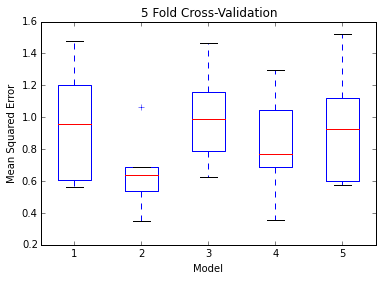

In [7]:
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import metrics
# Switching to scikit-learn since that's more comfortable for me

X = np.array(X)
y = np.array(y)

n_folds = 5
kfold = cross_validation.KFold(X.shape[0],n_folds=n_folds,shuffle=True)
scores = np.zeros([n_folds,models.shape[0]])
n = 0
for train,test in kfold:
    for i in range(models.shape[0]):
        X_train = X[train,:]
        X_train = X_train[:,models[i,:]]
        X_test = X[test,:]
        X_test = X_test[:,models[i,:]]
        y_train = y[train]
        y_test = y[test]
        model = linear_model.LinearRegression()
        model.fit(X_train,y_train)
        y_hat = model.predict(X_test)
        scores[n,i] = metrics.mean_squared_error(y_hat,y_test)
    n += 1
plt.boxplot(scores)
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.title('5 Fold Cross-Validation')

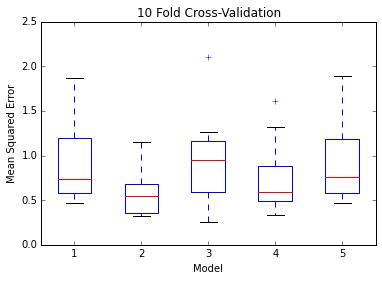

In [8]:
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import metrics
# Switching to scikit-learn since that's more comfortable for me

X = np.array(X)
y = np.array(y)

n_folds = 10
kfold = cross_validation.KFold(X.shape[0],n_folds=n_folds,shuffle=True)
scores = np.zeros([n_folds,models.shape[0]])
n = 0
for train,test in kfold:
    for i in range(models.shape[0]):
        X_train = X[train,:]
        X_train = X_train[:,models[i,:]]
        X_test = X[test,:]
        X_test = X_test[:,models[i,:]]
        y_train = y[train]
        y_test = y[test]
        model = linear_model.LinearRegression()
        model.fit(X_train,y_train)
        y_hat = model.predict(X_test)
        scores[n,i] = metrics.mean_squared_error(y_hat,y_test)
    n += 1
plt.boxplot(scores)
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.title('10 Fold Cross-Validation')

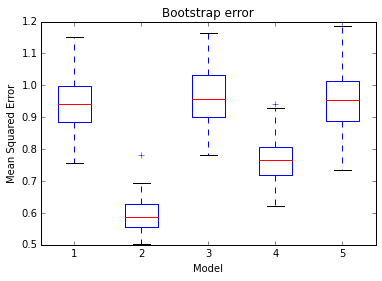

In [9]:
def build_bootstrap_sample(n,rng_state=None):
    held_out = np.ones(n,dtype=bool)
    np.random.RandomState(rng_state)
    samples = []
    for _ in range(n):
        k = np.random.randint(n)
        samples.append(k)
        held_out[k] = False
    samples = np.array(samples)
    return samples,held_out
    
n_folds = 100
scores = np.zeros([n_folds,models.shape[0]])
for i in range(n_folds):
    samples,held_out = build_bootstrap_sample(X.shape[0])
    y_train = y[samples]
    y_test = y[held_out]
    for j in range(models.shape[0]):
        X_train = X[samples,:]
        X_test = X[held_out,:]
        X_train = X_train[:,models[j,:]]
        X_test = X_test[:,models[j,:]]
        model = linear_model.LinearRegression()
        model.fit(X_train,y_train)
        y_train_hat = model.predict(X_train)
        y_test_hat = model.predict(X_test)
        err_bar = metrics.mean_squared_error(y_train,y_train_hat)
        err_boot = metrics.mean_squared_error(y_test_hat,y_test)
        err = 0.368*err_bar + 0.632*err_boot
        scores[i,j] = err
plt.boxplot(scores)
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.title('Bootstrap error')

Here we compared four different methods of model validation: AIC, 5-fold cross-validation, 10-fold cross-validation, and bootstrap validation. We compared these four methods of validation on 5 different 3-variable models. In all four methods showed that the second model was the best model.

## 25/25

## Question 3

Fit a series of random-forest classifiers to the very low birthweight infant data (`vlbw.csv`), to explore the sensitivity to the parameter `m`, the number of variables considered for splitting at each step. Plot both the out-of-bag error as well as the test error against a suitably-chosen range of values for `m`.

C:\Users\Andrew Plassard\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: the 'outtype' keyword is deprecated, use 'orient' instead


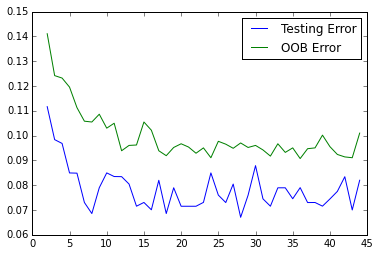

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn.feature_extraction import DictVectorizer
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

def encode_onehot(df, cols):
    """
    One-hot encoding is applied to columns specified in a pandas DataFrame.
    
    Modified from: https://gist.github.com/kljensen/5452382
    
    Details:
    
    http://en.wikipedia.org/wiki/One-hot
    http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
    
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    vec = DictVectorizer()
    
    vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict(outtype='records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    return df



mat = pd.read_csv('../data/vlbw.csv',sep=',')
X = mat.copy()
y = X.pop('dead')
_ = X.pop('Unnamed: 0')
mask = np.zeros(X.shape[1],dtype=bool)
mask[5] = True
mask[8] = True
mask[14] = True
mask[20] = True
mask[21] = True
mask[22] = True
mask[24] = True
X = encode_onehot(X,[x for x in X.columns[mask]])
X = np.array(X)
y = np.array(y)
X[np.isnan(X)] = -1

min_estimators = 2
max_estimators = X.shape[1]
n_folds = 10

test_error = np.zeros((max_estimators-min_estimators+1,n_folds))
oob_error = np.zeros((max_estimators-min_estimators+1,n_folds))

kfold = KFold(X.shape[0],n_folds=n_folds,shuffle=True)

n_fold = 0
for train,test in kfold:
    X_train = X[train,:]
    X_test = X[test,:]
    y_train = y[train]
    y_test = y[test]
    n_est = 0
    for i in range(min_estimators,max_estimators+1):
        clf = RandomForestClassifier(max_features=i,oob_score=True,warm_start=True)
        clf.fit(X_train,y_train)
        oob_err = 1 - clf.oob_score_
        test_err = 1 - clf.score(X_test,y_test)
        oob_error[n_est,n_fold] = oob_err
        test_error[n_est,n_fold] = test_err
        n_est += 1
    n_fold += 1
    
plt.plot(np.arange(min_estimators,max_estimators+1),test_error.mean(axis=1),np.arange(min_estimators,max_estimators+1),oob_error.mean(axis=1))
plt.legend(["Testing Error","OOB Error"])

In this section we parsed the dataset into a matrix. We encoded the features into one-hot vectors where appropriate and identified NaNs for features in another column. We then performed random forest regression with increasing numbers of features. We found that the hinge point occurs near 10 features per tree. This is higher than the typical metric of (sqrt(num_features)) that is used in most random forest packages. It should be noted that it is most likely best if certain categorical features are kept together or handled slightly differently such as the categorical "yes"/"no"/"NA" values that we coded.

## 25/25

## Bonus: Question 4

Use a grid search to optimize the number of estimators and max_depth for a Gradient Boosted Decision tree using the very low birthweight infant data. Plug this optimal ``max_depth`` into a *single* decision tree.  Does this single tree over-fit or under-fit the data? Repeat this for the Random Forest.  Construct a single decision tree using the ``max_depth`` which is optimal for the Random Forest.  Does this single tree over-fit or under-fit the data?

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

def encode_onehot(df, cols):
    """
    One-hot encoding is applied to columns specified in a pandas DataFrame.
    
    Modified from: https://gist.github.com/kljensen/5452382
    
    Details:
    
    http://en.wikipedia.org/wiki/One-hot
    http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
    
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    vec = DictVectorizer()
    
    vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict(outtype='records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    return df



mat = pd.read_csv('../data/vlbw.csv',sep=',')
X = mat.copy()
y = X.pop('dead')
_ = X.pop('Unnamed: 0')
mask = np.zeros(X.shape[1],dtype=bool)
mask[5] = True
mask[8] = True
mask[14] = True
mask[20] = True
mask[21] = True
mask[22] = True
mask[24] = True
X = encode_onehot(X,[x for x in X.columns[mask]])
X = np.array(X)
y = np.array(y)
X[np.isnan(X)] = -1


C:\Users\Andrew Plassard\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: the 'outtype' keyword is deprecated, use 'orient' instead


In [12]:
#function to print report from 
#http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html#example-model-selection-randomized-search-py
from operator import itemgetter
def report(grid_scores, n_top=10):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
param_grid = {
    "n_estimators":[2,10,25,50,100],
    "max_depth":[1,2,3,4,5,10,25,50,None]
}

clf = GradientBoostingClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid,verbose=False)
grid_search.fit(X, y)
report(grid_search.grid_scores_)


Model with rank: 1
Mean validation score: 0.897 (std: 0.037)
Parameters: {'max_depth': 2, 'n_estimators': 50}

Model with rank: 2
Mean validation score: 0.891 (std: 0.015)
Parameters: {'max_depth': 1, 'n_estimators': 50}

Model with rank: 3
Mean validation score: 0.888 (std: 0.025)
Parameters: {'max_depth': 2, 'n_estimators': 25}

Model with rank: 4
Mean validation score: 0.887 (std: 0.017)
Parameters: {'max_depth': 1, 'n_estimators': 25}

Model with rank: 5
Mean validation score: 0.881 (std: 0.037)
Parameters: {'max_depth': 1, 'n_estimators': 100}

Model with rank: 6
Mean validation score: 0.872 (std: 0.065)
Parameters: {'max_depth': 2, 'n_estimators': 100}

Model with rank: 7
Mean validation score: 0.852 (std: 0.013)
Parameters: {'max_depth': 2, 'n_estimators': 10}

Model with rank: 8
Mean validation score: 0.846 (std: 0.026)
Parameters: {'max_depth': 1, 'n_estimators': 10}

Model with rank: 9
Mean validation score: 0.817 (std: 0.125)
Parameters: {'max_depth': 3, 'n_estimators': 25}


## Minor point, but its never a good idea to hard-code the best parameter values -- just pass along the attribute

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import KFold

n_folds = 10

clf = DecisionTreeClassifier(max_depth = 2)
kf = KFold(n=X.shape[0],n_folds=n_folds)

scores = []
for train,test in kf:
    X_train = X[train,:]
    y_train = y[train]
    X_test = X[test,:]
    y_test = y[test]
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
print(np.mean(scores))

0.87181738367


Looks like it underfit with just one tree

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
param_grid = {
    "n_estimators":[2,10,25,50,100],
    "max_depth":[1,2,3,4,5,10,25,50,None]
}

clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid,verbose=False)
grid_search.fit(X, y)
report(grid_search.grid_scores_)


Model with rank: 1
Mean validation score: 0.864 (std: 0.027)
Parameters: {'max_depth': 2, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.863 (std: 0.016)
Parameters: {'max_depth': 1, 'n_estimators': 2}

Model with rank: 3
Mean validation score: 0.863 (std: 0.028)
Parameters: {'max_depth': 2, 'n_estimators': 50}

Model with rank: 4
Mean validation score: 0.855 (std: 0.050)
Parameters: {'max_depth': 2, 'n_estimators': 2}

Model with rank: 5
Mean validation score: 0.852 (std: 0.020)
Parameters: {'max_depth': 3, 'n_estimators': 100}

Model with rank: 6
Mean validation score: 0.849 (std: 0.021)
Parameters: {'max_depth': 3, 'n_estimators': 50}

Model with rank: 7
Mean validation score: 0.846 (std: 0.029)
Parameters: {'max_depth': 3, 'n_estimators': 2}

Model with rank: 8
Mean validation score: 0.839 (std: 0.035)
Parameters: {'max_depth': None, 'n_estimators': 2}

Model with rank: 9
Mean validation score: 0.838 (std: 0.043)
Parameters: {'max_depth': 2, 'n_estimators': 10}



In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import KFold

n_folds = 10

clf = DecisionTreeClassifier(max_depth = 3)
kf = KFold(n=X.shape[0],n_folds=n_folds)

scores = []
for train,test in kf:
    X_train = X[train,:]
    y_train = y[train]
    X_test = X[test,:]
    y_test = y[test]
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
print(np.mean(scores))

0.90153643547


It looks like the random forest underfits with the feature selection process.

It is interesting to note that in both cases fairly small sized trees were found to be ideal. It would be worth a deeper consideration to see if decision functions that are multivariate instead of univariate provide better results.

Its unclear in this case if we are just supposed to use the tree and not cross validate so here is the same thing not cross-validated

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X,y)
score = clf.score(X,y)
print("The score with depth=2 (best result for Gradient Boosted Tree) is ",score)

clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)
score = clf.score(X,y)
print("The score with depth=3 (best result for Random Forest) is ",score)

The score with depth=2 (best result for Gradient Boosted Tree) is  0.889716840537
The score with depth=3 (best result for Random Forest) is  0.910581222057


Since both of these out perform their not cross-validate counterparts, it does appear that these trees overfit the data. On the other hand, the tree of depth=2 does not out perform the Gradient Boosted Tree so that is interesting.

## 25/25

## Overall: 75+25=100/75